In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load the datasets
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

In [6]:
# Function to preprocess data
def preprocess_data(df):
    # Handle missing values
    categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed']
    for feature in categorical_features:
        df[feature].fillna(df[feature].mode()[0], inplace=True)

    numerical_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
    for feature in numerical_features:
        df[feature].fillna(df[feature].median(), inplace=True)

    # Encode binary categorical features using label encoding
    binary_features = ['Gender', 'Married', 'Self_Employed']
    le = LabelEncoder()
    for feature in binary_features:
        df[feature] = le.fit_transform(df[feature])

    df = pd.get_dummies(df, columns=['Dependents', 'Education', 'Property_Area'], drop_first=True)

    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
    df['Balance_Income'] = df['Total_Income'] - (df['EMI'] * 1000)  # Assuming LoanAmount is in thousands
    
    return df

In [7]:
# Preprocess train and test data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [8]:
# Align test set with train set
test_df = test_df.reindex(columns=train_df.columns.drop('Loan_Status'), fill_value=0)

In [9]:
# Prepare data for clustering
X_train = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
X_test = test_df.drop(columns=['Loan_ID'])

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]


c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

In [21]:
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [12]:
# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [13]:
# Predict clusters for training and test data
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

In [14]:
# Add cluster labels to the original data
train_df['Cluster'] = train_clusters
test_df['Cluster'] = test_clusters

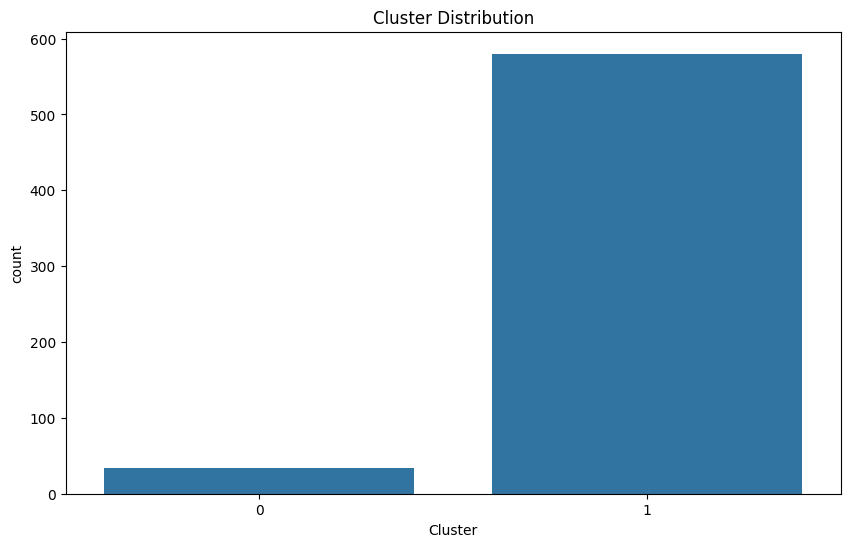

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=train_df)
plt.title('Cluster Distribution')
plt.show()

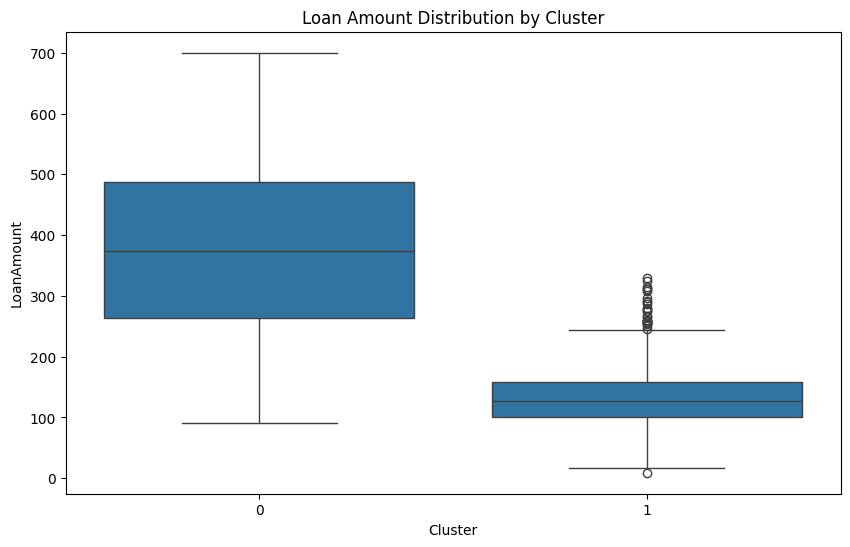

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='LoanAmount', data=train_df)
plt.title('Loan Amount Distribution by Cluster')
plt.show()

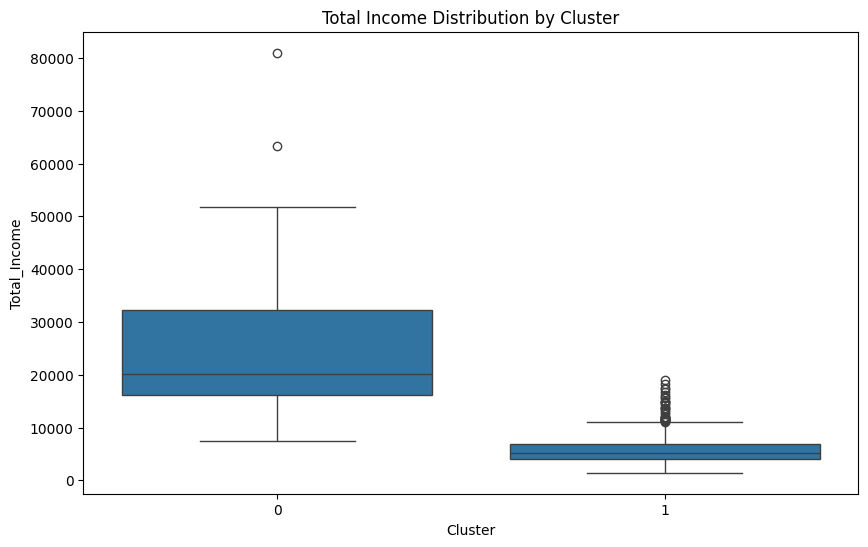

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_Income', data=train_df)
plt.title('Total Income Distribution by Cluster')
plt.show()

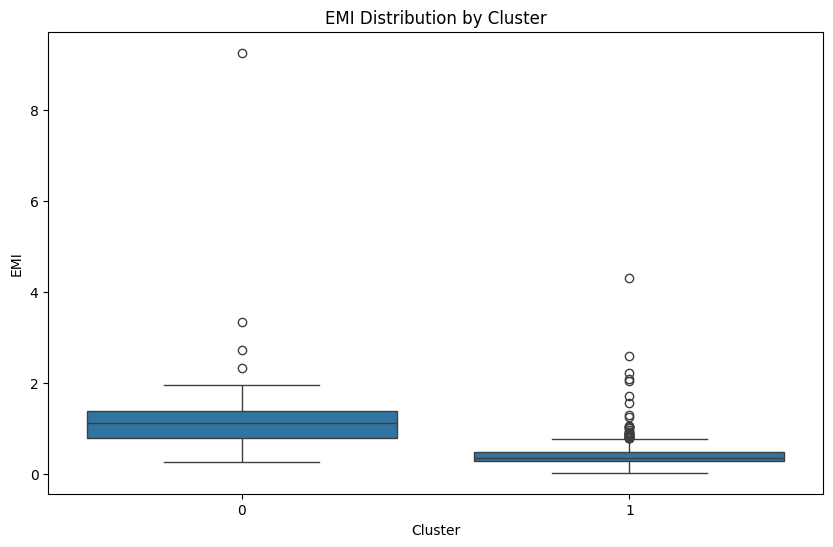

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='EMI', data=train_df)
plt.title('EMI Distribution by Cluster')
plt.show()

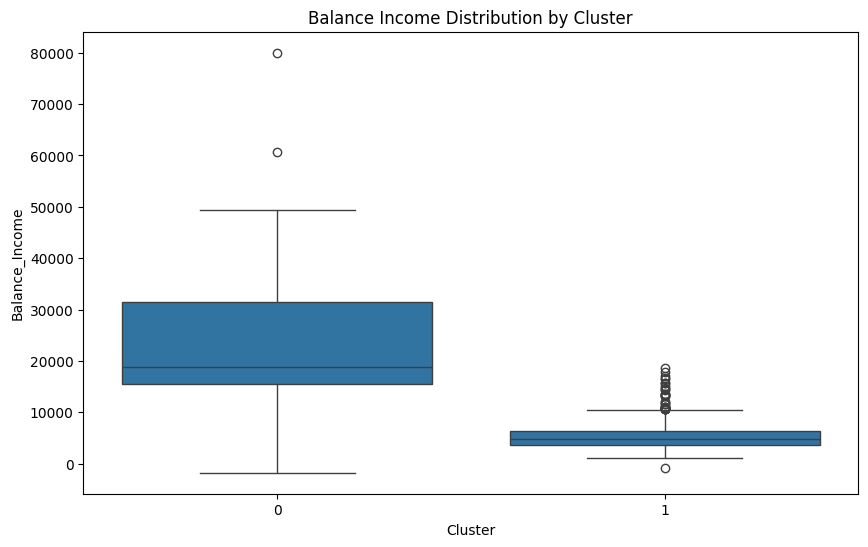

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Balance_Income', data=train_df)
plt.title('Balance Income Distribution by Cluster')
plt.show()